# Titanic Survivor Prediction with Logistic Regression and Naive Bayes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.model_selection
import sklearn.metrics
import sklearn.naive_bayes

In [6]:
df_titanic = pd.read_csv("titanic.csv")

In [8]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA

In [13]:
df_survived = df_titanic[ df_titanic['Survived'] == 1 ]
df_unsurvived = df_titanic[ df_titanic['Survived'] == 0 ]

df_unsurvived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [17]:
df_survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [21]:
# Count the survived and unsurvived
print("Total =", len(df_titanic))

print("Number of passengers who survived =", len(df_survived))
print("Percentage Survived =", 1. * len(df_survived) / len(df_titanic) * 100.0, "%")
 
print("Number of passengers who did not Survive =", len(df_unsurvived))
print("Percentage who did not survive =", 1. * len(df_unsurvived) / len(df_titanic) * 100.0, "%")
         

Total = 891
Number of passengers who survived = 342
Percentage Survived = 38.38383838383838 %
Number of passengers who did not Survive = 549
Percentage who did not survive = 61.61616161616161 %


<Axes: xlabel='Pclass', ylabel='count'>

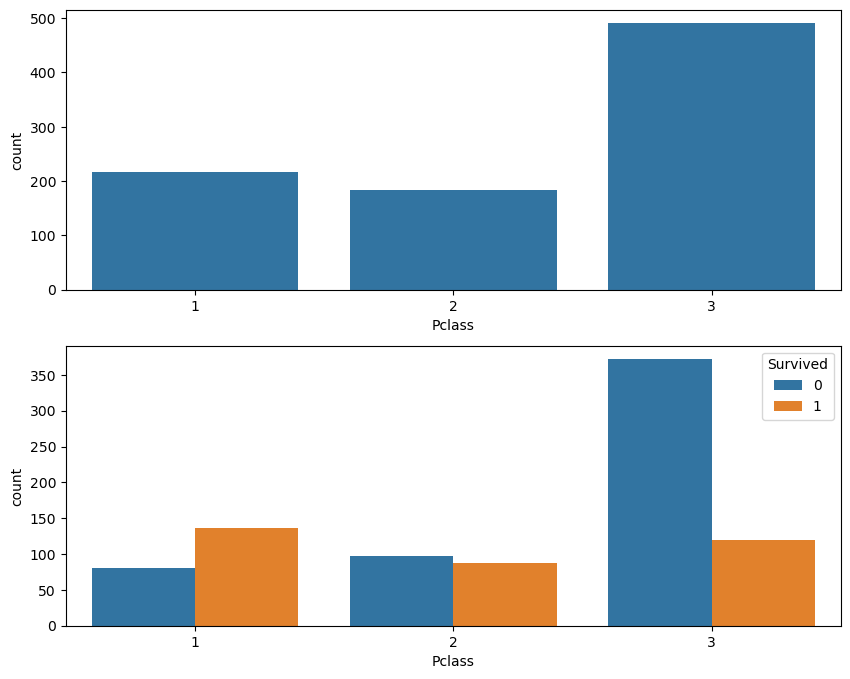

In [27]:
# Bar Chart to indicate the number of people who survived based on their class
# If you are a first class, you have a higher chance of survival
plt.figure(figsize = [10, 8])
plt.subplot(211)
sns.countplot(x = 'Pclass', data = df_titanic)
plt.subplot(212)
sns.countplot(x = 'Pclass', hue = 'Survived', data = df_titanic)

<Axes: xlabel='SibSp', ylabel='count'>

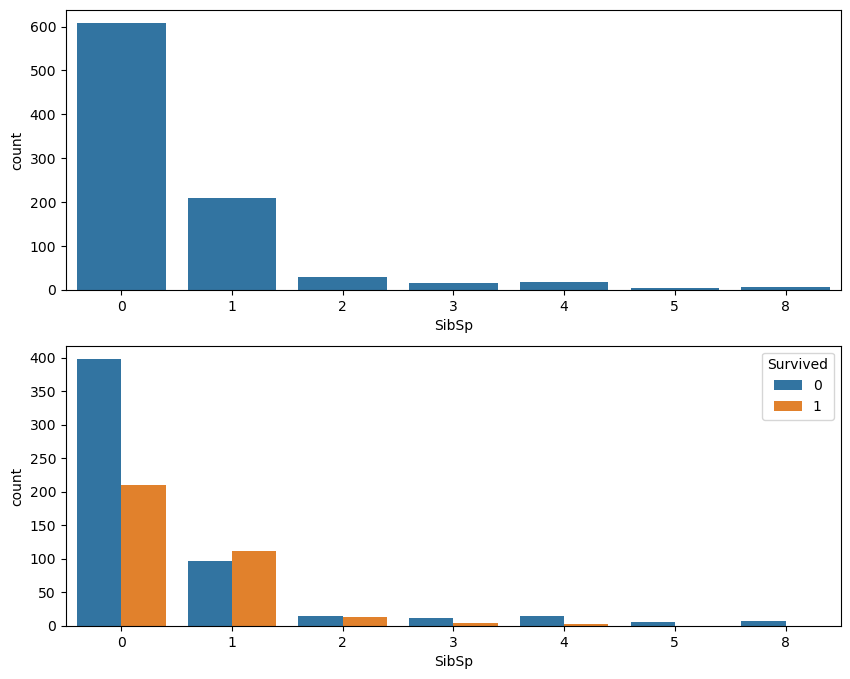

In [32]:
plt.figure(figsize = [10,8])
plt.subplot(211)
sns.countplot(x = 'SibSp', data = df_titanic)
plt.subplot(212)
sns.countplot(x = 'SibSp', hue = 'Survived', data =df_titanic)

<Axes: xlabel='Parch', ylabel='count'>

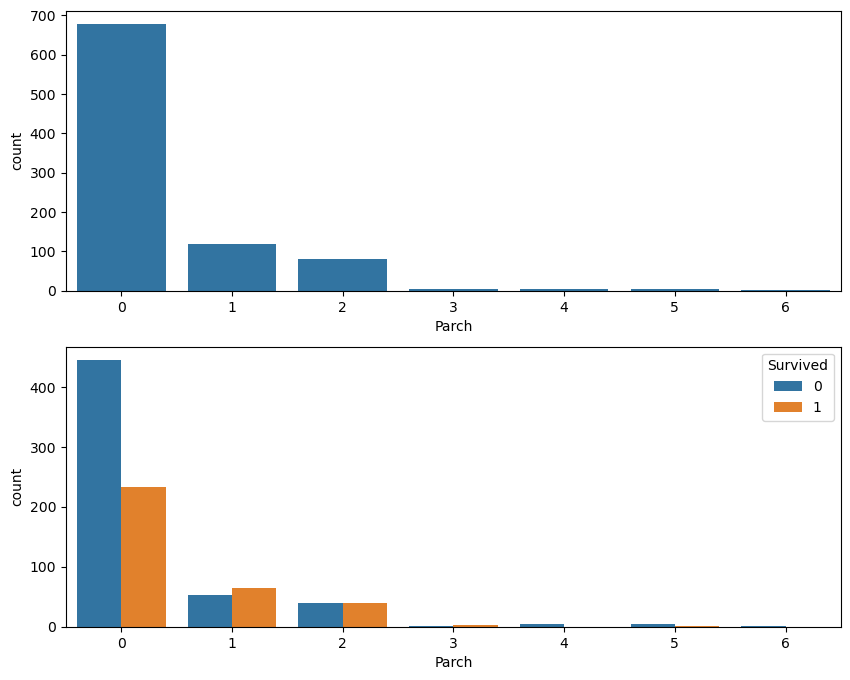

In [34]:
# Bar Chart to indicate the number of people survived based on their Parch status (how many parents onboard)
# If you have 1, 2, or 3 family members (Parch = 1,2), you have a higher chance of survival compared to being alone (Parch = 0)
plt.figure(figsize = [10, 8])
plt.subplot(211)
sns.countplot(x = 'Parch', data = df_titanic)
plt.subplot(212)
sns.countplot(x = 'Parch', hue = 'Survived', data =df_titanic)

<Axes: xlabel='Sex', ylabel='count'>

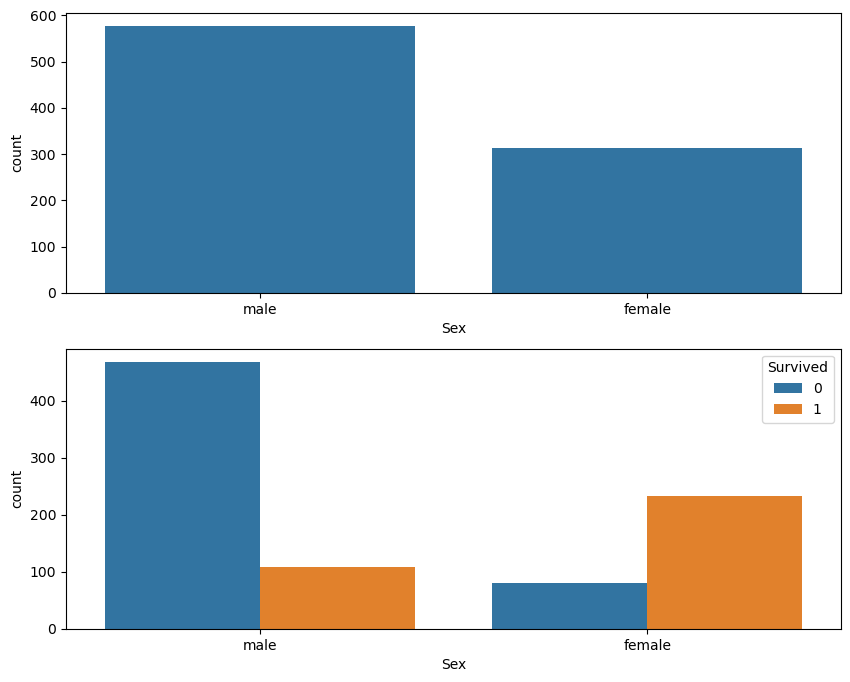

In [36]:
# Bar Chart to indicate the number of people survived based on their sex
# If you are a female, you have a higher chance of survival compared to other ports!
plt.figure(figsize = [10, 8])
plt.subplot(211)
sns.countplot(x = 'Sex', data = df_titanic)
plt.subplot(212)
sns.countplot(x = 'Sex', hue = 'Survived', data = df_titanic)

<Axes: >

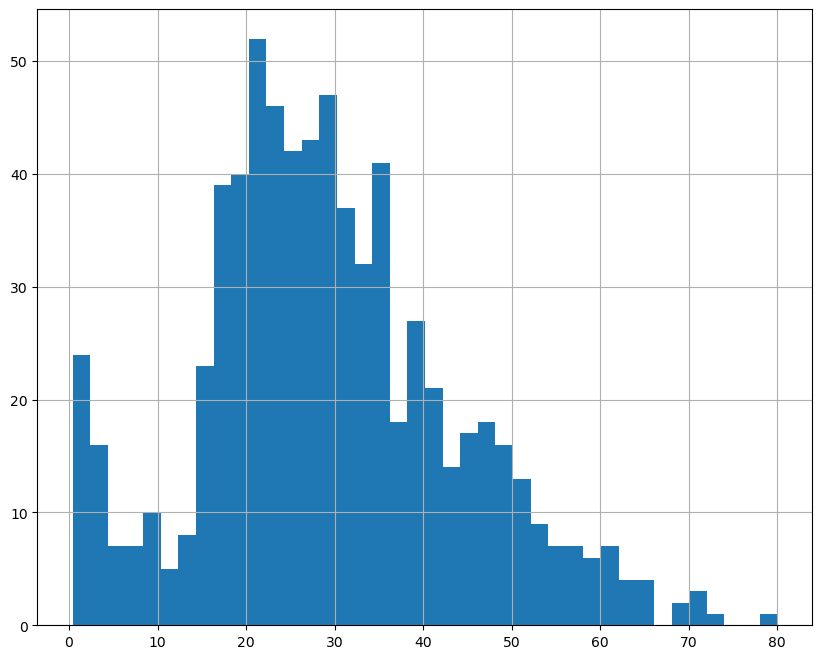

In [38]:
# Age Histogram 
plt.figure(figsize = [10,8])
df_titanic['Age'].hist(bins =40)

<Axes: >

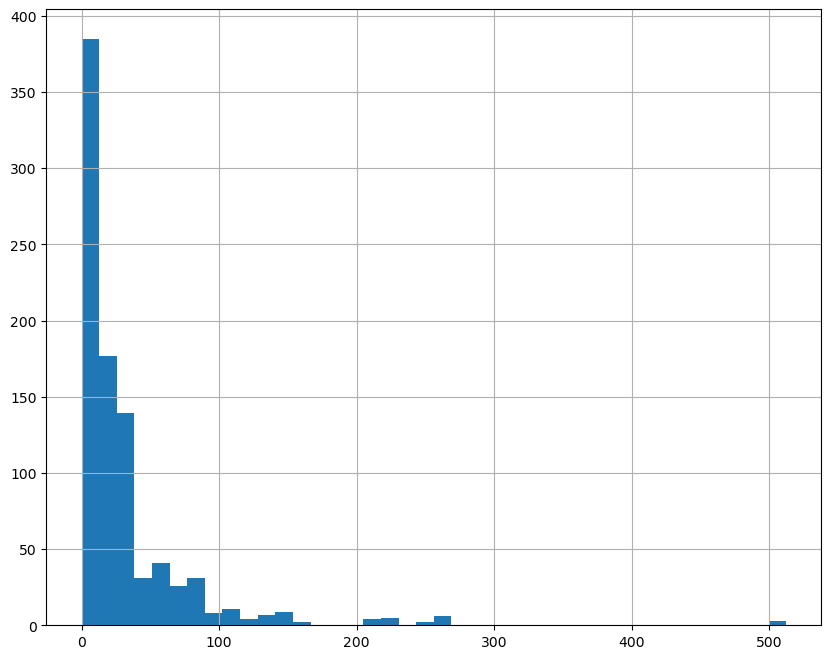

In [40]:
plt.figure(figsize = [10,8])
df_titanic['Fare'].hist(bins =40)

## Data cleaning and Feature Engineering

<Axes: >

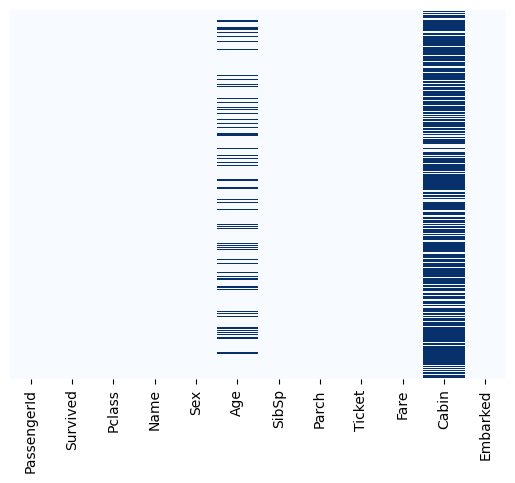

In [42]:
# Let's explore which dataset is missing
sns.heatmap(df_titanic.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [46]:
# Let's drop the cabin coloumn and test with inplace = true and false
df_titanic.drop('Cabin', axis = 1, inplace = True)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [48]:
# Let's drop the embarked, Ticket, passengerID, and Name as well
df_titanic.drop(['Name', 'Ticket', 'Embarked', 'PassengerId'], axis = 1, inplace = True)

In [50]:
df_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


<Axes: >

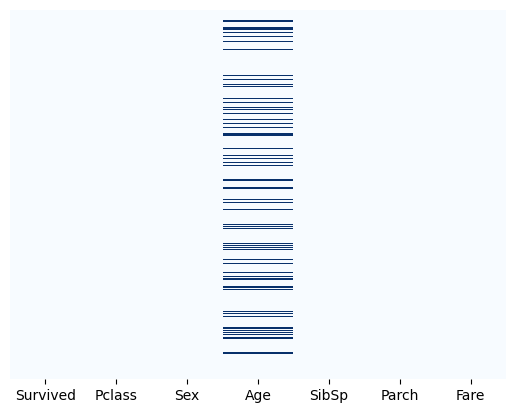

In [52]:
# Let's view the data one more time!
sns.heatmap(df_titanic.isnull(), yticklabels = False, cbar = False, cmap="Blues")


<Axes: xlabel='Sex', ylabel='Age'>

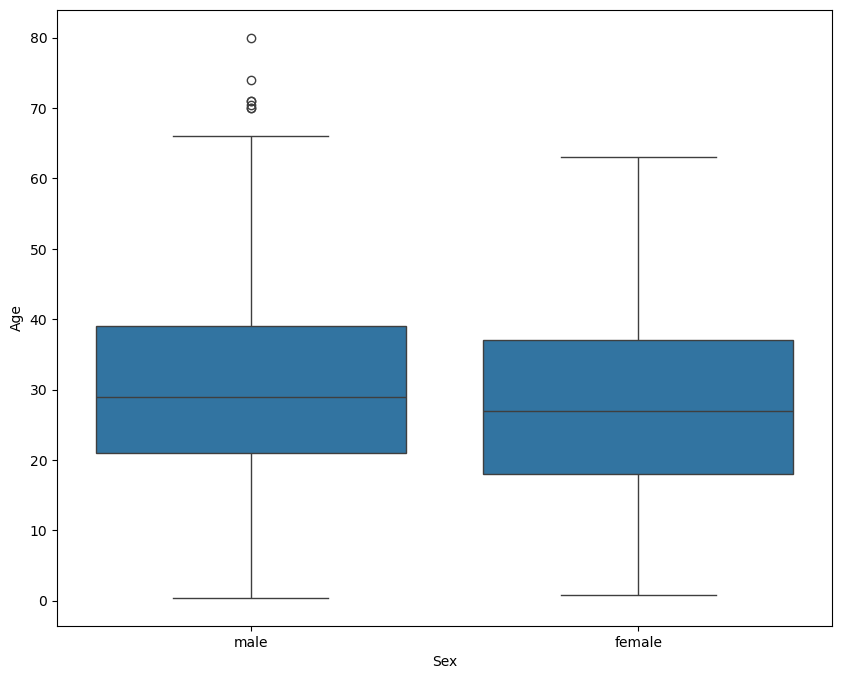

In [54]:
# Let's get the average age for male (~29) and female (~25)
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'Sex', y = 'Age', data = df_titanic)

In [58]:
def Fill_Age(data):
    age = data[0]
    sex = data[1]

    if pd.isnull(age):
        if sex == 'male': 
            return 29
        else:
            return 25
    else:
        return age
        

In [62]:
df_titanic['Age'] = df_titanic[['Age', 'Sex']].apply(Fill_Age, axis = 1)

C:\Users\Edward\AppData\Local\Temp\ipykernel_19312\3948865956.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age = data[0]
C:\Users\Edward\AppData\Local\Temp\ipykernel_19312\3948865956.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sex = data[1]


<Axes: >

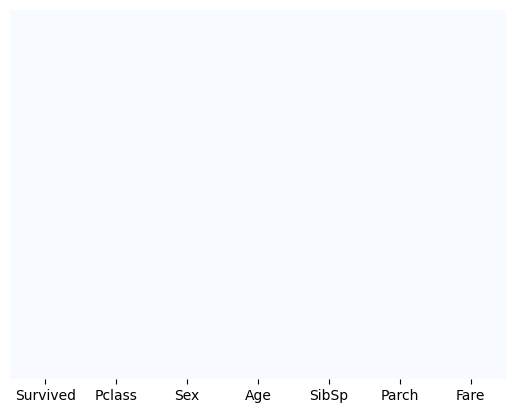

In [64]:
# Let's view the data one more time!
sns.heatmap(df_titanic.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [66]:
# You just need one column only to represent male or female
pd.get_dummies(df_titanic['Sex'])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [68]:
male = pd.get_dummies(df_titanic['Sex'], drop_first = True)


In [70]:
male

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [72]:
# first let's drop the embarked and sex 
df_titanic.drop(['Sex'], axis = 1, inplace = True)

In [74]:
# Now let's add the encoded column male again
df_titanic = pd.concat([df_titanic, male], axis = 1)

In [76]:
df_titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,True
1,1,1,38.0,1,0,71.2833,False
2,1,3,26.0,0,0,7.9250,False
3,1,1,35.0,1,0,53.1000,False
4,0,3,35.0,0,0,8.0500,True
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True
887,1,1,19.0,0,0,30.0000,False
888,0,3,25.0,1,2,23.4500,False
889,1,1,26.0,0,0,30.0000,True


## Logistic Regression Classifier Model

In [81]:
#Let's drop the target coloumn before we do train test split
X = df_titanic.drop('Survived', axis = 1).values
y = df_titanic['Survived'].values


In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [91]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [93]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

<Axes: >

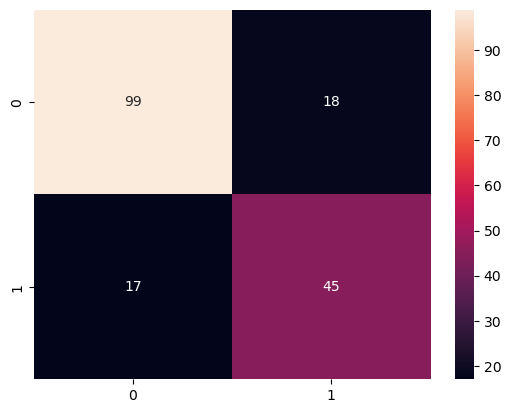

In [95]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True, fmt = "d")

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       117
           1       0.71      0.73      0.72        62

    accuracy                           0.80       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.81      0.80      0.80       179



## Naive Bayes Model

In [99]:
# Fitting Naive Bayes Classifier Model
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       117
           1       0.73      0.53      0.62        62

    accuracy                           0.77       179
   macro avg       0.76      0.71      0.73       179
weighted avg       0.77      0.77      0.76       179



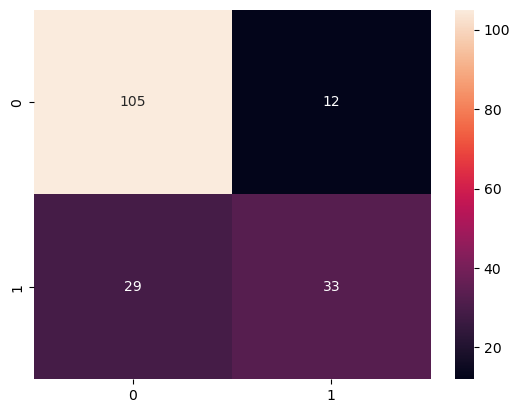

In [101]:
y_predict_test = classifier.predict(X_test)
y_predict_test

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True, fmt = "d")

print(classification_report(y_test, y_predict_test))